## Histogram nedir?

Kesikli veya sürekli verileri özetlemek için bir histogram kullanılır. Başka bir deyişle, belirli bir değer aralığı içinde kalan veri noktalarının sayısını göstererek sayısal verilerin görsel bir yorumunu sağlar.

### Histogram Nedir ve Ne İşe Yarar?

Histogram, bir veri kümesinin frekans dağılımını görmenizi sağlar. Histogramlar, geçmiş verilerin grafiğini çizmek için en sık kullanılan yöntemlerden biridir. Veriler tipik olarak, görüntüleyenlere bilgileri hızlı bir şekilde özümsemeleri için bir yol sağlayan bir çubuk grafikte görüntülenir. Anahtar, bilgiyi mantıksal bir sırayla sunmaktır. Yatay ve dikey eksen kullanan basit bir grafiktir.

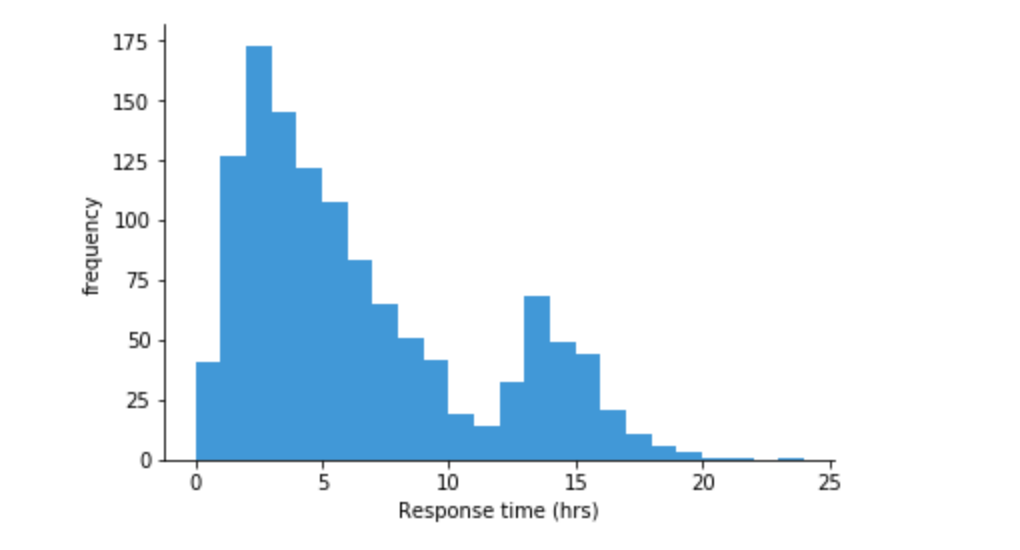

### Barchart vs Histogram

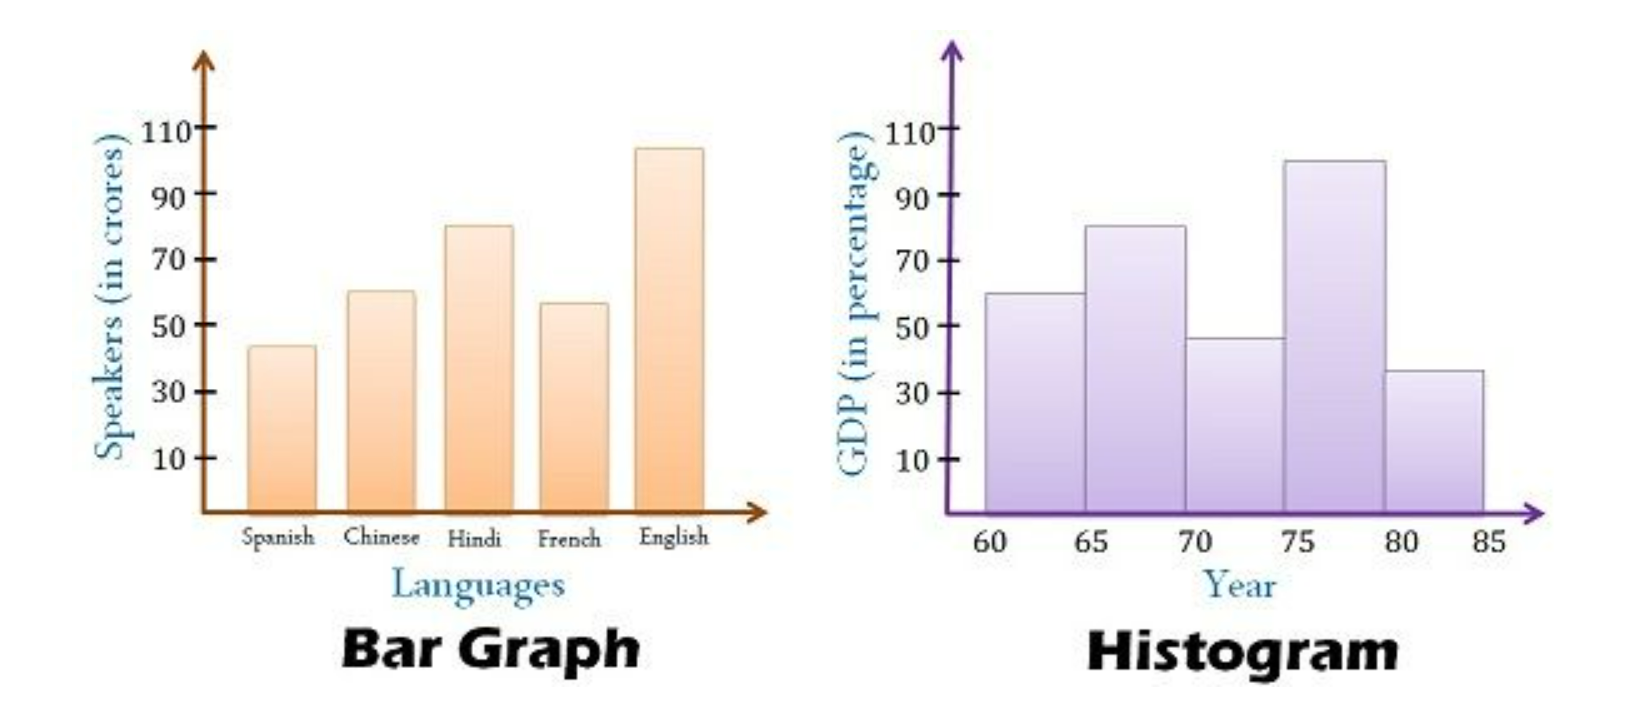

In [ ]:
value_counts()

## Görselin histogramı olur mu hiç?

Histogram bir resimdeki renk değerlerinin sayılarını gösteren grafiktir. 

Görüntü geliştirme teknikleri iki ana kategoriye ayrılır.


- > **Konumsal alan (Spatial domain) teknikleri**

    Görüntü piksellerinin doğrudan işlenmesi

- > **Frekans alanı (Frequency domain) teknikleri**

    Görüntünün Fourier dönüşümü veya dalgacık (wavelet) dönüşümü manipülasyonu


Şu an için konumsal alanda faaliyet gösteren tekniklere odaklanmaya devam.

Görüntünün histogramı bize görüntüdeki gri düzeylerin dağılımını gösterir. Görüntü işlemede, özellikle segmentasyonda çok faydalıdır.

In [1]:
import matplotlib.pyplot as plt
from utils import show_img
import numpy as np
import cv2 as cv

In [10]:
img = cv.imread('../VisualMaterials/Photos/cats 2.jpg')
gs_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_img(gs_img)

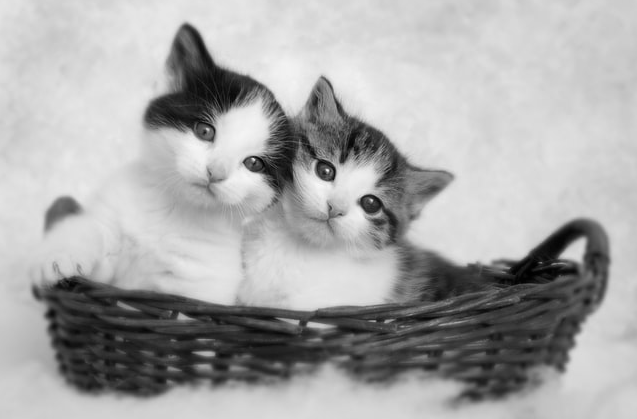

In [3]:
gs_img.shape

(427, 640)

Histogramını almak için bu iki boyutlu matrisi dümdüz hale getirmek gerekir.

In [4]:
gs_img

array([[226, 226, 226, ..., 209, 210, 211],
       [226, 226, 226, ..., 209, 210, 211],
       [226, 226, 226, ..., 208, 210, 210],
       ...,
       [205, 205, 205, ..., 207, 207, 207],
       [205, 205, 206, ..., 207, 207, 207],
       [206, 206, 206, ..., 207, 207, 207]], dtype=uint8)

In [5]:
gs_img.ravel()

array([226, 226, 226, ..., 207, 207, 207], dtype=uint8)

In [7]:
gs_img.ravel().shape

(273280,)

In [8]:
427 * 640

273280

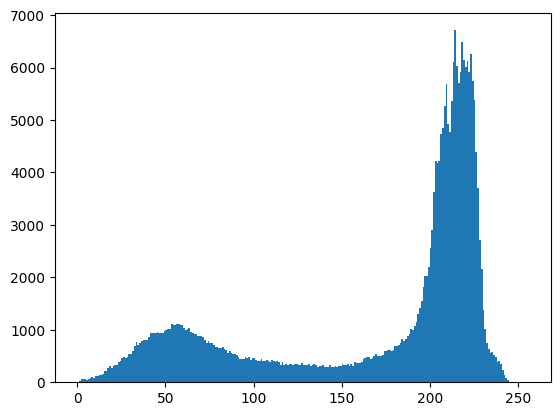

In [9]:
plt.hist(x = gs_img.ravel(),
         bins = 256,
         range=[0,256]);

plt.show()

Oldukça karanlık bir resmin histogramını çizdirsek?

In [11]:
img = cv.imread('../VisualMaterials/Photos/cat.jpg')
gs_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_img(gs_img)

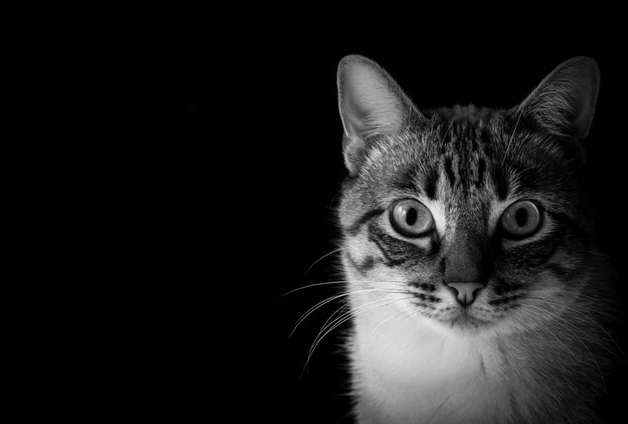

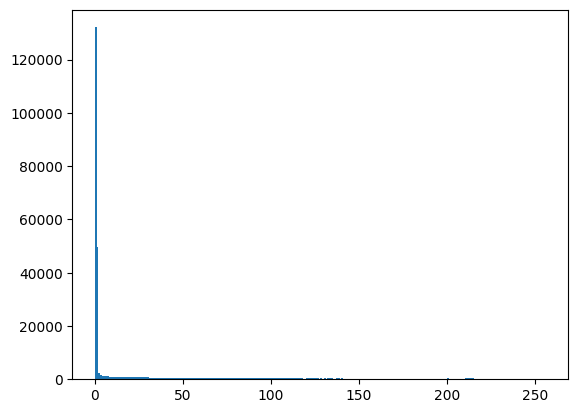

In [12]:
plt.hist(x = gs_img.ravel(),
         bins = 256,
         range=[0,256]);
plt.show()

Neredeyse hiç standart sapması yok, sapmamış, hep karanlık bir temadan oluşuyor.

Resmin standart sapması mı olur?

In [13]:
import pandas as pd

pd.Series(gs_img.ravel()).describe()

count    273280.000000
mean         26.783416
std          52.329725
min           0.000000
25%           0.000000
50%           1.000000
75%          24.000000
max         239.000000
dtype: float64

Tamamen siyah resim koysaydık?

In [14]:
img = cv.imread('../VisualMaterials/Photos/black.jpg')
gs_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_img(gs_img)

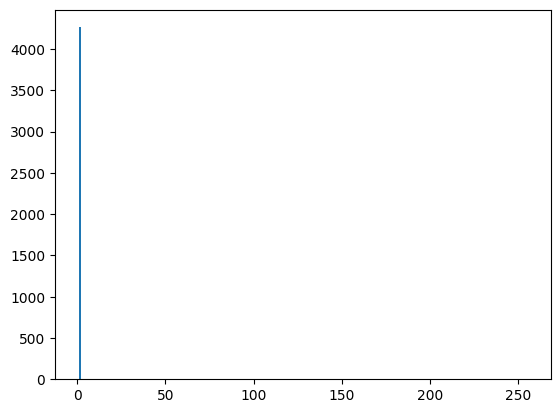

In [15]:
plt.hist(x = gs_img.ravel(),
         bins = 256,
         range=[0,256]);

plt.show()

In [16]:
gs_img.shape

(52, 82)

In [17]:
52*82

4264

In [18]:
pd.Series(gs_img.ravel()).describe()

count    4264.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

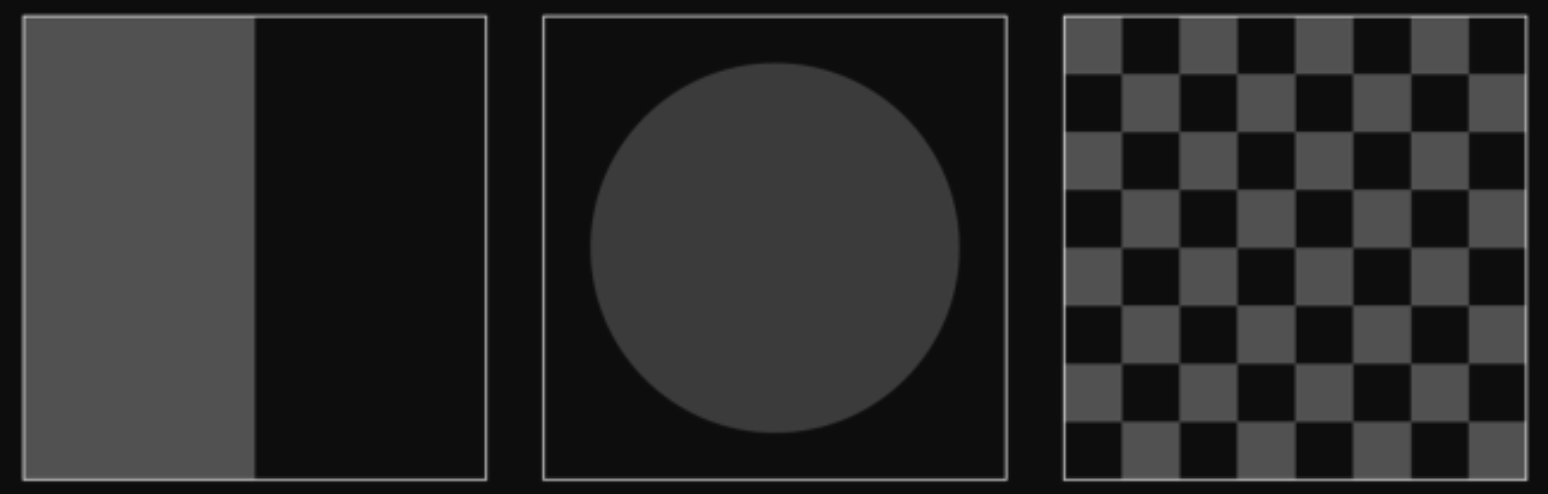

Yukarıdaki üç adet görüntünün histogramları hakkında fikri olan?

- Histogramlar sadece istatistiksel bilgilerdir, piksellerin konumu hakkında hiçbir bilgi vermez.

Görüntüyü histogramı üzerinden yeniden oluşturabilir miyiz?

Histogramlar görüntü yakalama sorunlarını tespit etmeye yardımcı olur.

• **Görüntü ile ilgili sorunlar histogramda tanımlanabilir**;

• Aşırı ve az pozlama

• Parlaklık

• Kontrast

• Dinamik Renk Aralığı


• **Nokta işlemleri histogramı değiştirmek için kullanılabilir.**

• Toplama

• Çarpma

• Exp ve Log

• Yoğunluk Penceresi (Kontrast Değişikliği)

Gri tonlamalı bir görüntünün parlaklığı, görüntüdeki tüm piksellerin ortalama yoğunluğudur.

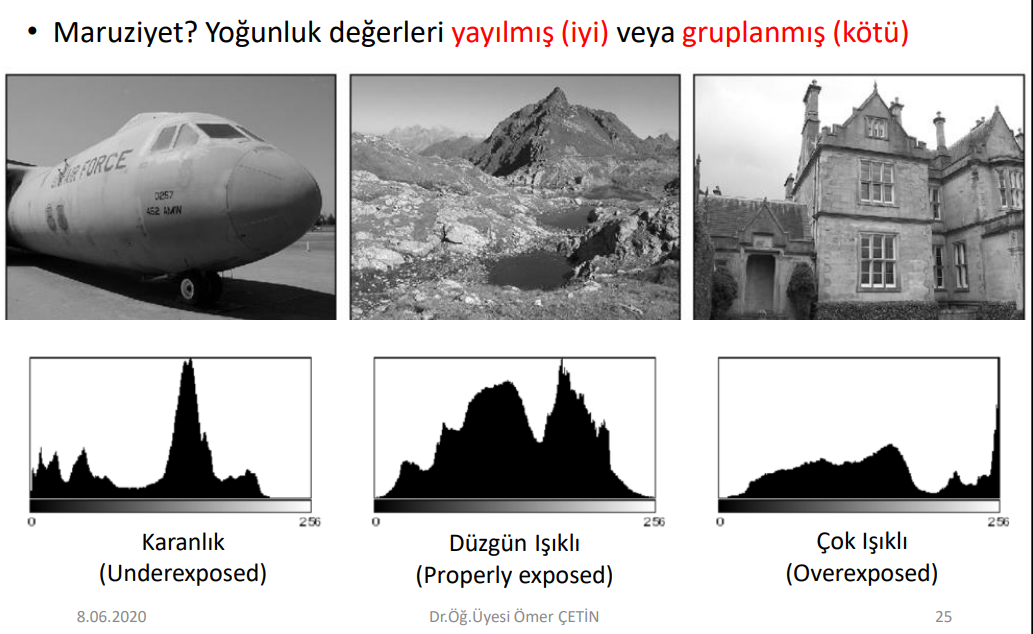

### Histogram Dengeleme Nedir? (Histogram Equalization)

Histogram dengeleme veya eşitleme de bir resimdeki renk değerlerinin belli bir yerde kümelenmiş olmasından kaynaklanan renk dağılımı bozukluğunu gidermek için kullanılan bir yöntem.

Bu yöntem, her resmi iyileştirmez. Yalnızca tüm piksellerin belli araklıkta renk değerine sahip olduğu resimlerde etkilidir.



**Normalleştirilmiş Histogram Oluşturmak?**

Histogramı olasılık dağılım fonksiyonuna çevirmek için yapmamız gereken her bir değerin serideki tüm değerlerin toplamına bölünmesi. Bu bölüm gerçekleştirilince çıkan değerlerin toplamı 1 sayısına eşit olacak ve oluşan seri görselin olasılık dağılım fonksiyonunu verecek.

In [21]:
img = cv.imread('../VisualMaterials/Photos/denosed_lady.jpg')
gs_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_img(gs_img, 'Lady')

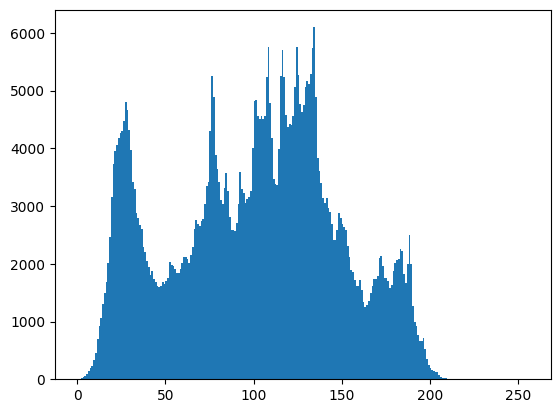

In [20]:
plt.hist(x = gs_img.ravel(),
         bins = 256,
         range=[0,256]);
plt.show()

In [22]:
# of a image using cv2.equalizeHist()
equ = cv.equalizeHist(gs_img)
equ

array([[206, 200, 204, ..., 204, 184, 140],
       [202, 200, 207, ..., 207, 191, 147],
       [203, 200, 207, ..., 204, 186, 145],
       ...,
       [  8,  13,  17, ...,  85,  80,  78],
       [ 11,  13,  15, ...,  89,  85,  83],
       [  9,  13,  21, ...,  85,  89,  94]], dtype=uint8)

In [23]:
equ.shape

(737, 739)

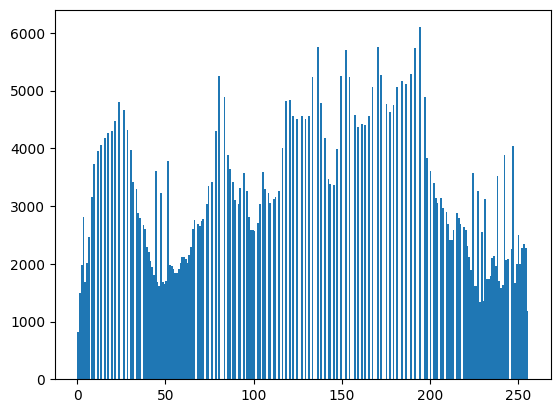

In [24]:
plt.hist(x = equ.ravel(),
         bins = 256,
         range=[0,256]);
plt.show()

In [25]:
show_img(equ)

In [26]:
# stacking images side-by-side
stacked_img = np.hstack((gs_img, equ))
show_img(stacked_img)

Histogram dengeleme veya eşitleme de bir resimdeki renk değerlerinin belli bir yerde kümelenmiş olmasından kaynaklanan renk dağılımı bozukluğunu gidermek için kullanılan bir yöntem.

In [27]:
image = cv.imread('../VisualMaterials/Photos/cats.jpg')
show_img(image, 'RGB Cats')

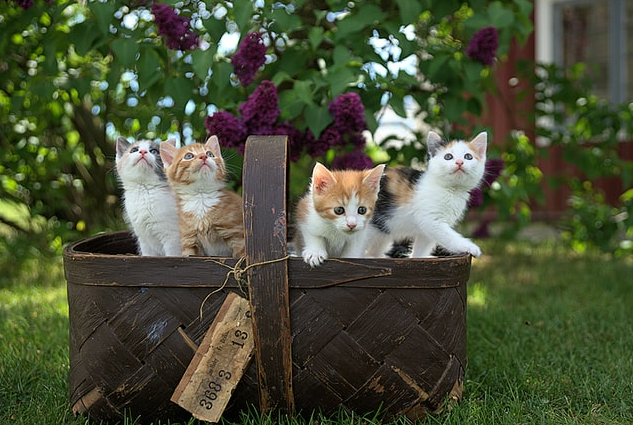

In [28]:
# split the image into its respective channels, then initialize the
# tuple of channel names along with our figure for plotting
channels = cv.split(image)
channels

(array([[18,  5,  3, ..., 50, 49, 48],
        [17, 10, 10, ..., 50, 48, 47],
        [13, 13, 12, ..., 50, 48, 47],
        ...,
        [32, 13,  9, ..., 18, 14, 43],
        [27, 18, 11, ..., 43, 20, 28],
        [ 8, 16, 13, ..., 50, 45, 48]], dtype=uint8),
 array([[ 28,  16,  16, ...,  70,  69,  68],
        [ 29,  25,  28, ...,  70,  68,  67],
        [ 34,  36,  40, ...,  69,  67,  66],
        ...,
        [ 61,  42,  38, ...,  67,  62,  92],
        [ 53,  44,  37, ...,  95,  70,  78],
        [ 34,  42,  38, ..., 102,  94,  98]], dtype=uint8),
 array([[35, 20, 18, ..., 65, 64, 63],
        [33, 27, 27, ..., 65, 63, 62],
        [32, 32, 34, ..., 66, 64, 63],
        ...,
        [46, 27, 23, ..., 51, 44, 72],
        [40, 31, 24, ..., 78, 52, 60],
        [21, 29, 28, ..., 85, 78, 80]], dtype=uint8))

In [29]:
len(channels)

3

In [34]:
channels[2].shape

(428, 640)

In [30]:
show_img(channels[2])

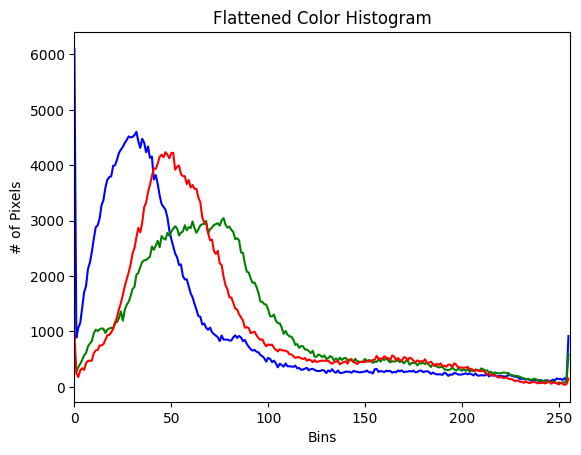

In [35]:
channels = cv.split(image)
colors = ("b", "g", "r")
plt.figure()

plt.title("Flattened Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (channel, color) in zip(channels, colors):
    # create a histogram for the current channel and plot it
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

In [36]:
image = cv.imread('../VisualMaterials/Photos/red.jpg')
show_img(image, 'RGB Cats')

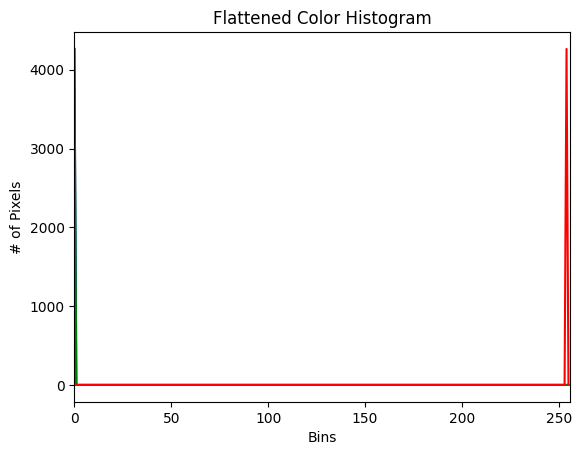

In [37]:
channels = cv.split(image)
colors = ("b", "g", "r")
plt.figure()

plt.title("Flattened Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (channel, color) in zip(channels, colors):
    # create a histogram for the current channel and plot it
    hist = cv.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

Sadece kırmızı renk olduğu için sadece kırmızı histogramı mevcut ve maksimum yoğunlukta.

### Peki ya CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [38]:
image = cv.imread('../VisualMaterials/Photos/cats.jpg')
gs_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
show_img(gs_img, 'RGB Cats')

Histogram eşitlemeden sonra arka plan kontrastının arttığı doğrudur. Ancak histogram eşitleme sonrası aşırı parlaklık nedeniyle bilgileri kaybetmek olasıdır. Bunun nedeni, histogramının önceki durumlarda gördüğümüz gibi belirli bir bölgeyle sınırlı olmamasıdır.

Bu sorunu çözmek için adaptif histogram eşitleme kullanılır. Bunda, görüntü "tiles (karo)" adı verilen küçük bloklara bölünmüştür (tileSize, OpenCV'de varsayılan olarak 8x8'dir). Daha sonra bu blokların her biri, her zamanki gibi histogram eşitlenir. Yani küçük bir alanda, histogram küçük bir bölgeyle sınırlı olacaktır (gürültü olmadığı sürece). Gürültü varsa, güçlendirilecektir. Bunu önlemek için de kontrast sınırlaması uygulanır. 

In [49]:
clahe = cv.createCLAHE(clipLimit = 5, tileGridSize=(15,15))
clahe_img = clahe.apply(gs_img)

In [50]:
stacked_img = np.hstack((gs_img, clahe_img))
show_img(stacked_img)

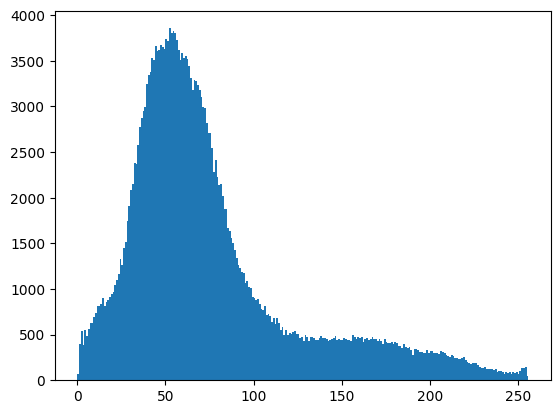

In [51]:
plt.hist(x = gs_img.ravel(),
         bins = 256,
         range=[0,256]);
plt.show()

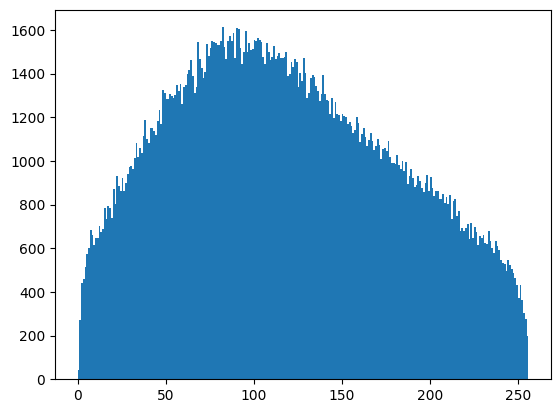

In [52]:
plt.hist(x = clahe_img.ravel(),
         bins = 256,
         range=[0,256]);
plt.show()